# EDA 목표
### 식별자 id 변수와 종속변수 loss를 제외한 총 변수는 130개<br>
=> 변수가 너무 많으므로 PCA를 이용해서 모델링을 해보자.

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os

In [17]:
os.chdir(r"C:\Users\ByungjooCho\Google 드라이브\스터디 프로젝트\allstate-claims-severity")
#os.chdir(r"C:\Users\Master\Google 드라이브\스터디 프로젝트\allstate-claims-severity")

In [18]:
df = pd.read_csv('train.csv', header='infer', encoding='latin1')

In [19]:
df.shape

(188318, 132)

###### 데이터 전체 결측치 확인

In [20]:
df.isnull().sum().sum()

0

In [21]:
X = df.drop(columns=["loss"])
Y = df.loss
header = df.columns
Y.columns=["loss"]

### 변수 변환¶
다음과 같은 경우에는 로그 함수 혹은 제곱근 함수 등을 사용하여 변환된 변수를 사용하면 회귀 성능이 향상될 수도 있다.<br>

독립 변수나 종속 변수가 심하게 한쪽으로 치우친 분포를 보이는 경우<br>
독립 변수와 종속 변수간의 관계가 곱셈 혹은 나눗셉으로 연결된 경우<br>
종속 변수와 예측치가 비선형 관계를 보이는 경우<br>
원래 선형회귀모형의 가정에는 독립 변수나 종속 변수가 반드시 대칭 분포를 보여야 한다는 가정은 없지만<br> 
정규 분포에 가까운 분포를 보일 수록 선형회귀모형의 성능이 좋아지는 경우가 많다.<br>

출처 :  https://datascienceschool.net/view-notebook/afb99de8cc0d407ba32079590b25180d/

In [22]:
loss_log = np.log(df.loss)

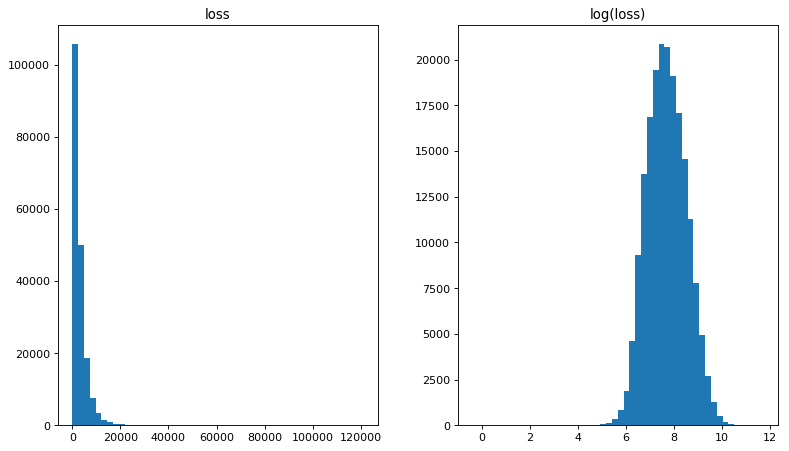

In [29]:
fig0=plt.figure(figsize=(10,5), dpi=80)       
axes1 = fig0.add_axes([0,0,0.4,1])            
axes2 = fig0.add_axes([0.5,0,0.4,1])          
axes1.hist(df.loss, bins =50)  
axes2.hist(loss_log, bins=50)
axes1.set_title('loss')
axes2.set_title('log(loss)')
plt.show()

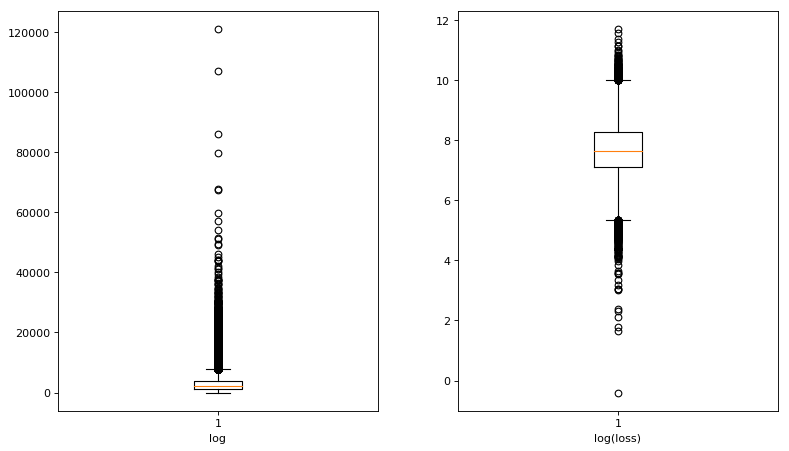

In [30]:
fig0=plt.figure(figsize=(10,5), dpi=80)       
axes1 = fig0.add_axes([0,0,0.4,1])            
axes2 = fig0.add_axes([0.5,0,0.4,1])          
axes1.boxplot(df.loss)  
axes2.boxplot(loss_log)
axes1.set_xlabel('log')
axes2.set_xlabel('log(loss)')

plt.show()

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(131822, 131)
(56496, 131)
(131822,)
(56496,)


### id 변수는 추후에 모델을 학습할 때는 제외해야하므로 일단 제외.

In [35]:
X_train_id = X_train["id"]
X_train= X_train.drop(columns=["id"])

In [36]:
X_test_id = X_test["id"]
X_test= X_test.drop(columns=["id"])

In [37]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(131822, 130)
(56496, 130)
(131822,)
(56496,)


In [38]:
pd.Series.unique(X_train.iloc[0:,0]) 

array(['A', 'B'], dtype=object)

### cat1 ~ cat116 카테고리의 등급 알아보기
PCA를 사용하기 위해서는 명목형 변수가 있어서는 안됨<br>
그래서 등급에 따라서 점수를 부여하려고 했으나, 데이터 구조상 그럴 수가 없음<br>
=> 더미변수의 필요성

In [41]:
#for i in range(0,116):
#    print(pd.Series.unique(X_train.iloc[0:,i]))

In [42]:
#for i in range(0,116):
#    print(pd.Series.value_counts(X_train.iloc[0:,i]))

In [89]:
X_train.iloc[:,115].values

array(['DJ', 'HA', 'DJ', ..., 'DP', 'CK', 'HL'], dtype=object)

In [80]:
X_train_le=X_train
X_train_le[X_train.columns[0:116]].values

array([['A', 'A', 'A', ..., 'C', 'L', 'DJ'],
       ['A', 'B', 'A', ..., 'A', 'K', 'HA'],
       ['A', 'B', 'A', ..., 'A', 'K', 'DJ'],
       ...,
       ['A', 'B', 'A', ..., 'A', 'P', 'DP'],
       ['B', 'B', 'A', ..., 'A', 'M', 'CK'],
       ['A', 'A', 'A', ..., 'F', 'O', 'HL']], dtype=object)

In [126]:
df=pd.DataFrame(X_train.iloc[:,0:116])

In [171]:
X=df['cat1'].values
cat_le =LabelEncoder()
X=cat_le.fit_transform(X)
print(X)

[0 0 0 ... 0 1 0]


In [204]:
X=df['cat116'].values
cat_le =LabelEncoder()
X=cat_le.fit_transform(X)
print(X)

[ 76 164  76 ...  82  52 175]


In [203]:
print(pd.unique(X_train['cat116']))
print(len(X_train['cat116'].unique()))

['DJ' 'HA' 'GC' 'DP' 'KR' 'CR' 'IH' 'LI' 'HK' 'CK' 'CB' 'IN' 'IE' 'EC'
 'HG' 'HX' 'GS' 'LO' 'HC' 'HH' 'DC' 'LN' 'HQ' 'EK' 'IT' 'CD' 'LF' 'CM'
 'CP' 'KC' 'LB' 'HN' 'HV' 'MD' 'IF' 'DF' 'GX' 'HB' 'GE' 'LM' 'KW' 'LL'
 'HJ' 'CU' 'CO' 'JX' 'FH' 'GK' 'IQ' 'CN' 'LJ' 'GB' 'BV' 'HL' 'GI' 'EO'
 'HW' 'FC' 'IC' 'FD' 'CT' 'K' 'EI' 'CS' 'ME' 'FR' 'KL' 'EG' 'IG' 'MG' 'DI'
 'E' 'EA' 'CW' 'GP' 'KJ' 'LW' 'CQ' 'BQ' 'JR' 'FE' 'BY' 'GT' 'DK' 'BP' 'HR'
 'GA' 'LV' 'FG' 'DS' 'CH' 'CI' 'EY' 'KA' 'KT' 'HM' 'KN' 'MJ' 'DH' 'FT'
 'JW' 'BD' 'LY' 'EE' 'HE' 'EP' 'KY' 'CC' 'HP' 'GU' 'GO' 'KD' 'MC' 'HI'
 'GN' 'FB' 'CG' 'BX' 'KX' 'LQ' 'GJ' 'LX' 'DD' 'DN' 'LC' 'MP' 'U' 'KP' 'HF'
 'FX' 'FV' 'IR' 'KB' 'MI' 'EH' 'DT' 'DL' 'GW' 'JP' 'GM' 'LD' 'EB' 'AX'
 'DU' 'EL' 'KI' 'MO' 'IY' 'MR' 'LH' 'KQ' 'GL' 'JL' 'FO' 'GF' 'IU' 'AJ'
 'JU' 'DA' 'MU' 'LE' 'ED' 'ID' 'KU' 'FA' 'MK' 'HY' 'EF' 'DX' 'MA' 'CA' 'H'
 'AC' 'LA' 'CL' 'AF' 'ES' 'BO' 'I' 'JM' 'AO' 'EJ' 'GV' 'FF' 'EN' 'AD' 'BF'
 'L' 'JE' 'IP' 'CF' 'FW' 'LU' 'MQ' 'CX' 'JF' 'KE' 'IL' 'I

In [207]:
a=[]
for i in df.columns:
    X=df[i].values
    cat_le =LabelEncoder()
    X=cat_le.fit_transform(X)
    a=+X
    print(a)

[0 0 0 ... 0 1 0]
[0 1 1 ... 1 1 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 1 0]
[0 1 1 ... 0 0 0]
[1 0 0 ... 0 0 1]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 1 1 ... 1 1 0]
[0 0 0 ... 1 0 0]
[0 0 0 ... 0 0 0]
[0 1 0 ... 0 0 0]
[0 1 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 1 1 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 1 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 1 1 ... 0 0 0]
[0 1 1 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 1]
[1 0 0 ... 0 0 1]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ...

Index(['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9',
       'cat10',
       ...
       'cat107', 'cat108', 'cat109', 'cat110', 'cat111', 'cat112', 'cat113',
       'cat114', 'cat115', 'cat116'],
      dtype='object', length=116)